In [155]:
def get_percentage_decrease_json(json, min_key=1024):
    min_val = json[min_key]['wer']
    out = {}
    for key in json:
        if key != min_key:
            out[key] = (min_val - json[key]['wer']) / min_val * 100
    return out

In [1]:
%cd ./Stanage/users/acp21rjf/long-context-asr/eval/results

[Errno 2] No such file or directory: './Stanage/users/acp21rjf/long-context-asr/eval/results'
/home/robertflynn/Stanage/users/acp21rjf/long-context-asr/eval/results


In [53]:
!ls

eval_config_wd.yaml	    evals_rb_sp2.csv
eval.ipynb		    evals_rotary_pos_3l.csv
evals_fourier_pos.csv	    evals_wd.csv
evals_fourier_pos_spec1csv  model_sizes.pdf
evals_no_rotary.csv	    wer_pos_earnings.pdf
evals_rb.csv		    werr_rb_across_datasets.pdf
evals_rb_sp1.csv


In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [64]:
csv = pd.read_csv('evals_fourier_pos_spec1csv', sep=',')

In [137]:
csv1 = pd.read_csv('evals_fourier_pos_spec1csv', sep=',')
csv2 = pd.read_csv('evals_fourier_pos.csv', sep=',')

In [138]:
csv1

,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
0,0,earnings22,dev,0.261936,fourier_pos_spec1,/mnt/parscratch/users/acp21rjf/spotify/fourier...,1,False,1024,0.875,SCConformerXL,-1
1,0,earnings22,dev,0.271091,fourier_pos_spec1,/mnt/parscratch/users/acp21rjf/spotify/fourier...,2,False,1024,0.875,SCConformerXL,-1
2,0,earnings22,dev,0.253219,fourier_pos_spec1,/mnt/parscratch/users/acp21rjf/spotify/fourier...,1,False,2048,0.875,SCConformerXL,-1
3,0,earnings22,dev,0.259702,fourier_pos_spec1,/mnt/parscratch/users/acp21rjf/spotify/fourier...,3,False,2048,0.875,SCConformerXL,-1
4,0,earnings22,dev,0.245007,fourier_pos_spec1,/mnt/parscratch/users/acp21rjf/spotify/fourier...,1,False,4096,0.875,SCConformerXL,-1
5,0,earnings22,dev,0.237626,fourier_pos_spec1,/mnt/parscratch/users/acp21rjf/spotify/fourier...,1,False,16384,0.875,SCConformerXL,-1
6,0,earnings22,dev,0.235064,fourier_pos_spec1,/mnt/parscratch/users/acp21rjf/spotify/fourier...,2,False,16384,0.875,SCConformerXL,-1
7,0,earnings22,dev,0.229763,fourier_pos_spec1,/mnt/parscratch/users/acp21rjf/spotify/fourier...,3,False,16384,0.875,SCConformerXL,-1
8,0,earnings22,dev,0.236180,fourier_pos_spec1,/mnt/parscratch/users/acp21rjf/spotify/fourier...,1,False,32768,0.875,SCConformerXL,-1
9,0,earnings22,dev,0.232413,fourier_pos_spec1,/mnt/parscratch/users/acp21rjf/spotify/fourier...,2,False,32768,0.875,SCConformerXL,-1


/tmp/ipykernel_9335/3628990326.py:11: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


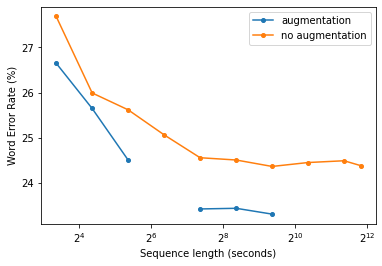

In [136]:
csv1_data = csv1.loc[csv1['dataset'] == 'earnings22'].loc[csv1['split'] == 'dev']
csv2_data = csv2.loc[csv2['dataset'] == 'earnings22'].loc[csv2['split'] == 'dev']
seq_lens = [512*2**(i+1) for i in range(9)] + [360000]

csv1_vals = [csv1_data.loc[csv1_data['seq_len'] == seq_len].wer.mean() for seq_len in seq_lens]
csv2_vals = [csv2_data.loc[csv2_data['seq_len'] == seq_len].wer.mean() for seq_len in seq_lens]

csv1_data_dict = {seq_len: {'wer':csv1_data.loc[csv1_data['seq_len'] == seq_len].wer.mean()} for seq_len in seq_lens}
csv2_data_dict = {seq_len: {'wer':csv2_data.loc[csv2_data['seq_len'] == seq_len].wer.mean()} for seq_len in seq_lens}

plt.xscale('log', basex=2)
plt.plot([el/100 for el in seq_lens], [csv1_data_dict[seq_len]['wer']*100 for seq_len in seq_lens], label='augmentation', marker='o', markersize=4)
plt.plot([el/100 for el in seq_lens], [csv2_data_dict[seq_len]['wer']*100 for seq_len in seq_lens], label='no augmentation', marker='o', markersize=4)
plt.legend()
plt.xlabel('Sequence length (seconds)')
plt.ylabel('Word Error Rate (%)')
#plt.savefig('model_sizes.pdf')
plt.show()


/tmp/ipykernel_9335/3663507234.py:13: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


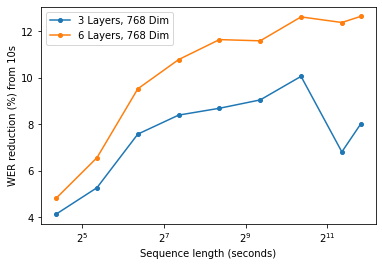

In [166]:
csv1 = pd.read_csv('evals_rotary_pos_3l.csv', sep=',')
csv2 = pd.read_csv('evals_rb.csv', sep=',')
csv1_data = csv1.loc[csv1['dataset'] == 'earnings22'].loc[csv1['split'] == 'test']
csv2_data = csv2.loc[csv2['dataset'] == 'earnings22'].loc[csv2['split'] == 'test']
seq_lens = [512*2**(i+1) for i in range(9)] + [360000]

csv1_vals = [csv1_data.loc[csv1_data['seq_len'] == seq_len].wer.mean() for seq_len in seq_lens]
csv2_vals = [csv2_data.loc[csv2_data['seq_len'] == seq_len].wer.mean() for seq_len in seq_lens]

csv1_data_dict = {seq_len: {'wer':csv1_data.loc[csv1_data['seq_len'] == seq_len].wer.mean()} for seq_len in seq_lens}
csv2_data_dict = {seq_len: {'wer':csv2_data.loc[csv2_data['seq_len'] == seq_len].wer.mean()} for seq_len in seq_lens}

plt.xscale('log', basex=2)
plt.plot([el/100 for el in seq_lens[1:]], [get_percentage_decrease_json(csv1_data_dict, min_key=1024)[seq_len] for seq_len in seq_lens[1:]], label='3 Layers, 768 Dim', marker='o', markersize=4)
plt.plot([el/100 for el in seq_lens[1:]], [get_percentage_decrease_json(csv2_data_dict, min_key=1024)[seq_len] for seq_len in seq_lens[1:]], label='6 Layers, 768 Dim', marker='o', markersize=4)
plt.legend()
plt.xlabel('Sequence length (seconds)')
plt.ylabel('WER reduction (%) from 10s')
plt.savefig('model_sizes.pdf', bbox_inches='tight')
plt.show()


In [66]:
csv.loc[csv['dataset'] == 'earnings22'].loc[csv['split'] == 'dev']

,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
0,0,earnings22,dev,0.311783,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1,False,1024,0.875,SCConformerXL,-1
1,0,earnings22,dev,0.306965,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2,False,1024,0.875,SCConformerXL,-1
2,0,earnings22,dev,0.320083,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,3,False,1024,0.875,SCConformerXL,-1
3,0,earnings22,dev,0.300701,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1,False,2048,0.875,SCConformerXL,-1
4,0,earnings22,dev,0.297832,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2,False,2048,0.875,SCConformerXL,-1
5,0,earnings22,dev,0.301161,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,3,False,2048,0.875,SCConformerXL,-1
6,0,earnings22,dev,0.300438,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1,False,4096,0.875,SCConformerXL,-1
7,0,earnings22,dev,0.294525,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2,False,4096,0.875,SCConformerXL,-1
8,0,earnings22,dev,0.299978,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,3,False,4096,0.875,SCConformerXL,-1
9,0,earnings22,dev,0.288458,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1,False,8192,0.875,SCConformerXL,-1


In [152]:
def get_data(df, dataset='earnings22', split='test'):
    seq_lens = df['seq_len'].unique().tolist()
    print(seq_lens)

    out_data = {}
    for seq_len in seq_lens:
        sset = df.loc[df['dataset'] == dataset].loc[df['split'] == split].loc[df['seq_len'] == seq_len]
        if len(sset) == 3:
            out_data[seq_len] = {'wer': sset['wer'].mean()*100, 'std': sset['wer'].std()*100}
        else:
            print(f'Sequence length {seq_len} has {len(sset)} results')
    return out_data

[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
Sequence length 1024 has 2 results


/tmp/ipykernel_9335/308322289.py:5: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


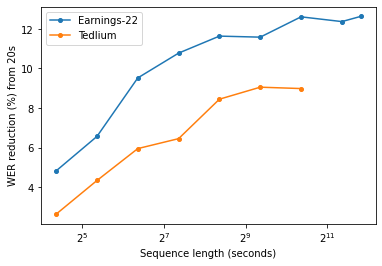

In [165]:
earnings_test = get_data(pd.read_csv('evals_rb.csv', sep=','))
tedlium_test = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='tedlium')
rev16 = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='rev16')

plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(earnings_test).keys())], [get_percentage_decrease_json(earnings_test)[key] for key in sorted(get_percentage_decrease_json(earnings_test).keys())], label='Earnings-22', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(tedlium_test).keys()) if el<=131072], [get_percentage_decrease_json(tedlium_test)[key] for key in sorted(get_percentage_decrease_json(tedlium_test).keys()) if key<=131072], label='Tedlium', marker='o', markersize=4)
#plt.plot([el/100 for el in sorted(get_percentage_decrease_json(rev16).keys())], [get_percentage_decrease_json(rev16)[key] for key in sorted(get_percentage_decrease_json(tedlium_test).keys())], label='Rev16', marker='o', markersize=4)

plt.legend()
plt.xlabel('Sequence length (seconds)')
plt.ylabel('WER reduction (%) from 20s')
plt.savefig('werr_rb_across_datasets.pdf', bbox_inches='tight') 
plt.show()

In [61]:
no_pos

{4096: {'wer': 19.720333040595275, 'std': 0.27550147126807834},
 8192: {'wer': 19.47661159106536, 'std': 0.10006167270516933},
 16384: {'wer': 19.286672249113277, 'std': 0.31272326112818755},
 2048: {'wer': 20.557700031996948, 'std': 0.20077883544219124},
 32768: {'wer': 19.091967403958087, 'std': 0.27479400653754593},
 360000: {'wer': 19.20497790848872, 'std': 0.4342514014723085},
 65536: {'wer': 19.000061270755467, 'std': 0.06429375748502734},
 131072: {'wer': 18.922451647162138, 'std': 0.07077884709336803},
 262144: {'wer': 19.456868792081092, 'std': 0.35305245312601996}}

In [140]:
original_results_earnings_test = [
    20.53, 19.44, 19.24, 18.67, 18.70, 18.61, 18.81
]
seq_lens = [1024, 2048, 4096, 8192, 16384, 32768, 360000]

In [134]:
2**17

131072

In [141]:
!ls

eval_config_wd.yaml	    evals_rb_sp2.csv
eval.ipynb		    evals_rotary_pos_3l.csv
evals_fourier_pos.csv	    evals_wd.csv
evals_fourier_pos_spec1csv  model_sizes.pdf
evals_no_rotary.csv	    wer_pos_earnings.pdf
evals_rb.csv		    werr_rb_across_datasets.pdf
evals_rb_sp1.csv


[2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 360000, 1024]
[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
[4096, 8192, 16384, 2048, 32768, 360000, 65536, 131072, 262144, 1024]
Sequence length 1024 has 2 results


/tmp/ipykernel_9335/3321325134.py:5: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


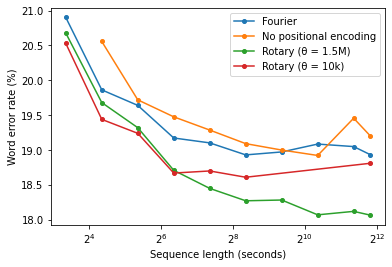

In [149]:
fourier_pos = get_data(pd.read_csv('evals_fourier_pos.csv', sep=','))
rotary_pos = get_data(pd.read_csv('evals_rb.csv', sep=','))
no_pos = get_data(pd.read_csv('evals_no_rotary.csv', sep=','))
# log scale
plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(fourier_pos.keys())], [fourier_pos[k]['wer'] for k in sorted(fourier_pos.keys())], label='Fourier', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(no_pos.keys())], [no_pos[k]['wer'] for k in sorted(no_pos.keys())], label='No positional encoding', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(rotary_pos.keys())], [rotary_pos[k]['wer'] for k in sorted(rotary_pos.keys())], label='Rotary (θ = 1.5M)', marker='o', markersize=4)
plt.plot([el/100 for el in seq_lens], original_results_earnings_test, label='Rotary (θ = 10k)', marker='o', markersize=4)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('Word error rate (%)')
plt.legend()
#plt.savefig('wer_pos_earnings.pdf', bbox_inches='tight')
plt.show()

In [9]:
out_data_rb

{}

In [10]:
original_results_earnings_test = [
    20.53, 19.44, 19.24, 18.67, 18.70, 18.61, 18.81
]
seq_lens = [1024, 2048, 4096, 8192, 16384, 32768, 360000]

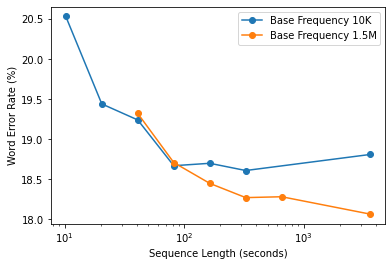

In [11]:
# log x axis
plt.xscale('log')
# add dots at each point
plt.plot([el / 100 for el in seq_lens], original_results_earnings_test, label='Base Frequency 10K', marker='o')
plt.plot([el /100 for el in list(out_data.keys())], [out_data[k]['wer'] for k in out_data.keys()], label='Base Frequency 1.5M', marker='o')
# add dot
plt.xlabel('Sequence Length (seconds)')
plt.ylabel('Word Error Rate (%)')
plt.legend()
#plt.savefig("rb_comparison.pdf")